In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#import utils
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [2]:
data = pd.read_csv('minute_weather.csv')

In [3]:
data.shape

(178859, 13)

In [4]:
data.head(178858)

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178853,178853,2012-01-12 09:44:20,918.1,58.28,119.0,1.2,161.0,1.6,85.0,0.5,0.0,0.0,20.0
178854,178854,2012-01-12 09:45:20,918.1,58.28,141.0,0.5,182.0,0.8,350.0,0.2,0.0,0.0,19.8
178855,178855,2012-01-12 09:46:20,918.1,58.46,124.0,2.0,158.0,2.5,110.0,1.4,0.0,0.0,20.2
178856,178856,2012-01-12 09:47:20,918.1,58.46,122.0,1.7,177.0,2.5,76.0,1.0,0.0,0.0,19.9


In [5]:
sampled_df = data[(data['rowID'] % 10) == 0]
sampled_df.shape

(17886, 13)

In [6]:
sampled_df

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
10,10,2011-09-10 00:10:49,912.3,62.24,144.0,1.2,167.0,1.8,115.0,0.6,0.0,0.0,38.5
20,20,2011-09-10 00:20:49,912.2,63.32,100.0,2.0,122.0,2.5,91.0,1.5,0.0,0.0,58.3
30,30,2011-09-10 00:30:49,912.2,62.60,91.0,2.0,103.0,2.4,71.0,1.4,0.0,0.0,57.9
40,40,2011-09-10 00:40:49,912.2,64.04,81.0,2.6,88.0,2.9,68.0,1.4,0.0,0.0,57.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178810,178810,2012-01-12 09:01:20,918.4,57.56,151.0,1.5,216.0,2.0,97.0,0.9,0.0,0.0,27.0
178820,178820,2012-01-12 09:11:20,918.4,57.74,81.0,2.3,96.0,2.9,58.0,2.0,0.0,0.0,22.7
178830,178830,2012-01-12 09:21:20,918.4,57.56,80.0,1.0,107.0,1.4,47.0,0.6,0.0,0.0,23.4
178840,178840,2012-01-12 09:31:20,918.3,57.74,166.0,1.1,217.0,1.5,77.0,0.7,0.0,0.0,21.4


In [7]:
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,17886.0,89425.000000,51633.877929,0.00,44712.5,89425.00,134137.5,178850.00
air_pressure,17886.0,917.848183,3.543958,906.40,915.7,917.50,919.6,929.50
air_temp,17886.0,60.060798,11.609873,38.48,50.0,60.26,69.8,90.68
avg_wind_direction,17878.0,142.871910,98.856227,0.00,49.0,162.00,209.0,359.00
avg_wind_speed,17878.0,2.692371,1.940921,0.00,1.3,2.20,3.6,23.40
max_wind_direction,17878.0,145.087929,94.071401,0.00,59.0,161.00,212.0,359.00
max_wind_speed,17878.0,3.326770,2.307331,0.10,1.7,2.70,4.4,24.50
min_wind_direction,17878.0,148.173957,104.638514,0.00,45.0,162.00,208.0,359.00
min_wind_speed,17878.0,2.044524,1.631791,0.00,0.9,1.60,2.8,21.60
rain_accumulation,17885.0,0.000389,0.005383,0.00,0.0,0.00,0.0,0.21


In [8]:
sampled_df[sampled_df['max_wind_direction']==0].shape

(40, 13)

In [9]:
sampled_df[sampled_df['rain_duration'] == 0].shape

(17635, 13)

In [10]:
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [11]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

In [12]:
rows_before - rows_after

8

In [13]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [14]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [15]:
select_df = sampled_df[features]

In [16]:
select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [17]:
select_df

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
...,...,...,...,...,...,...,...
178810,918.4,57.56,151.0,1.5,216.0,2.0,27.0
178820,918.4,57.74,81.0,2.3,96.0,2.9,22.7
178830,918.4,57.56,80.0,1.0,107.0,1.4,23.4
178840,918.3,57.74,166.0,1.1,217.0,1.5,21.4


In [18]:
X = StandardScaler().fit_transform(select_df)
X

array([[-1.56615931,  0.40429833, -0.46403948, ..., -0.41552504,
        -0.74840518,  0.60699936],
       [-1.56615931,  0.18721662,  0.01141174, ...,  0.23293672,
        -0.66172252, -0.17822048],
       [-1.59437951,  0.28025164, -0.43369153, ..., -0.24543671,
        -0.35833323,  0.52847737],
       ...,
       [ 0.15527264, -0.21593512, -0.6360112 , ..., -0.40489452,
        -0.83508783, -0.71716683],
       [ 0.12705244, -0.20042928,  0.23396338, ...,  0.76446275,
        -0.7917465 , -0.78855045],
       [ 0.09883225, -0.15391177, -0.46403948, ..., -0.18165359,
        -0.6183812 , -0.84922653]])

In [19]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [20]:
centers = model.cluster_centers_
centers

array([[ 0.12484368,  0.53269979,  1.5898312 , -0.69101768,  1.87641913,
        -0.6546187 , -0.58528131],
       [-0.13349049,  0.80604403, -1.03361669, -0.55834087, -0.94415149,
        -0.59248959, -0.50834708],
       [ 0.00708277,  0.86258945,  0.3960397 , -0.6529526 ,  0.59891314,
        -0.65448322, -0.52919567],
       [ 1.1065843 , -0.53218465, -0.92337772,  2.10779396, -0.850709  ,
         2.16335458, -0.88678456],
       [-0.2692336 , -0.91618498,  0.78437045, -0.59431544,  1.00996303,
        -0.58197008,  1.22939932],
       [-1.42470683, -1.03399214,  0.19830544,  2.4292879 ,  0.27419146,
         2.45414871,  1.08367556],
       [-1.09643479, -1.16978301,  0.53860345,  0.48660961,  0.6555788 ,
         0.48662474,  1.47826865],
       [ 1.65769684,  0.09771833, -0.85044164, -0.11408069, -0.72283667,
        -0.10149935, -0.96114041],
       [-0.29604958,  0.59960162,  0.57010867,  0.56261765,  0.6839185 ,
         0.4983102 , -0.1185216 ],
       [-0.0236342 ,  0.0158

In [21]:
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['class'] = P['prediction'].astype(int)
	return P

In [22]:
def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'class', color = my_colors, marker='o')

In [23]:
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction,class
0,0.124844,0.532700,1.589831,-0.691018,1.876419,-0.654619,-0.585281,0.0,0
1,-0.133490,0.806044,-1.033617,-0.558341,-0.944151,-0.592490,-0.508347,1.0,1
2,0.007083,0.862589,0.396040,-0.652953,0.598913,-0.654483,-0.529196,2.0,2
3,1.106584,-0.532185,-0.923378,2.107794,-0.850709,2.163355,-0.886785,3.0,3
4,-0.269234,-0.916185,0.784370,-0.594315,1.009963,-0.581970,1.229399,4.0,4
5,-1.424707,-1.033992,0.198305,2.429288,0.274191,2.454149,1.083676,5.0,5
6,-1.096435,-1.169783,0.538603,0.486610,0.655579,0.486625,1.478269,6.0,6
7,1.657697,0.097718,-0.850442,-0.114081,-0.722837,-0.101499,-0.961140,7.0,7
8,-0.296050,0.599602,0.570109,0.562618,0.683918,0.498310,-0.118522,8.0,8
9,-0.023634,0.015831,2.013524,-0.669163,-1.314844,-0.587642,0.069057,9.0,9


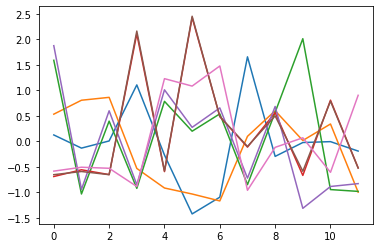

In [24]:
plt.plot(centers)

In [25]:
select_df

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
...,...,...,...,...,...,...,...
178810,918.4,57.56,151.0,1.5,216.0,2.0,27.0
178820,918.4,57.74,81.0,2.3,96.0,2.9,22.7
178830,918.4,57.56,80.0,1.0,107.0,1.4,23.4
178840,918.3,57.74,166.0,1.1,217.0,1.5,21.4


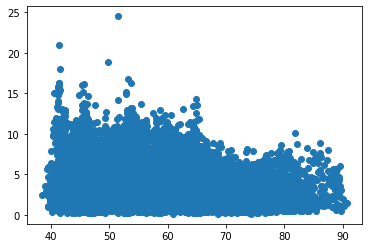

In [26]:
plt.scatter(select_df['air_temp'],select_df['max_wind_speed'])
plt.show()

# SUMMER

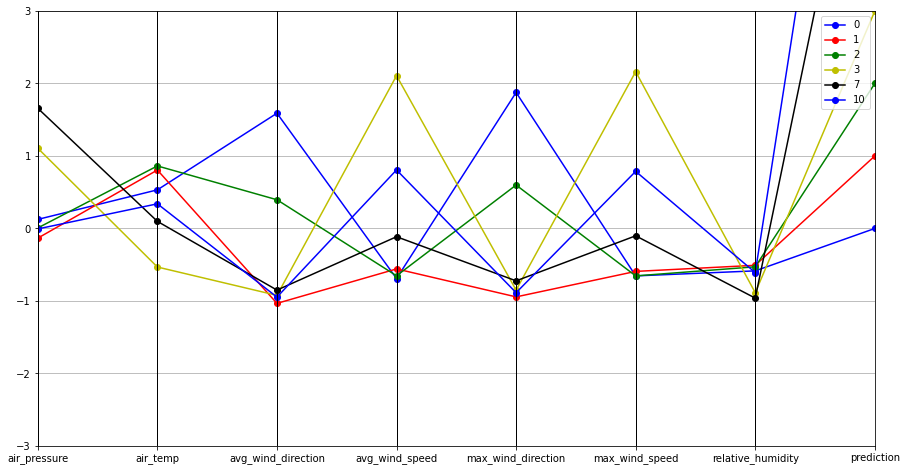

In [27]:
parallel_plot(P[P['relative_humidity'] < -0.5])

# SPRING

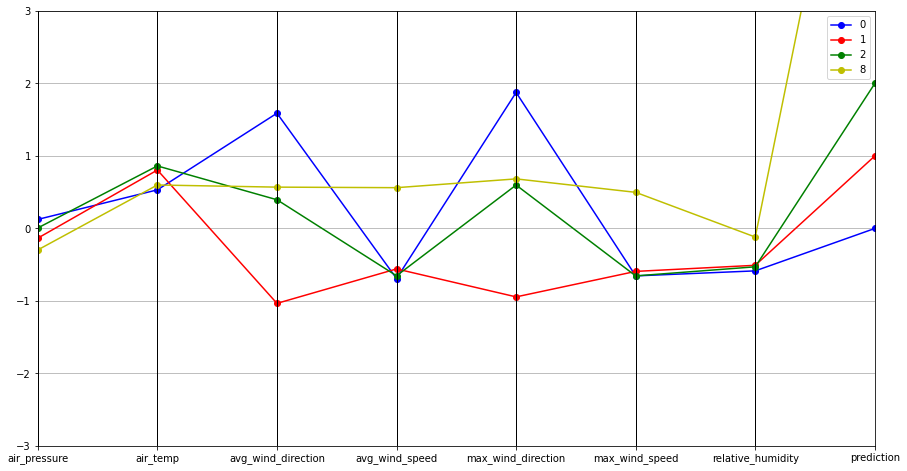

In [28]:
parallel_plot(P[P['air_temp'] > 0.5])

# WINTER

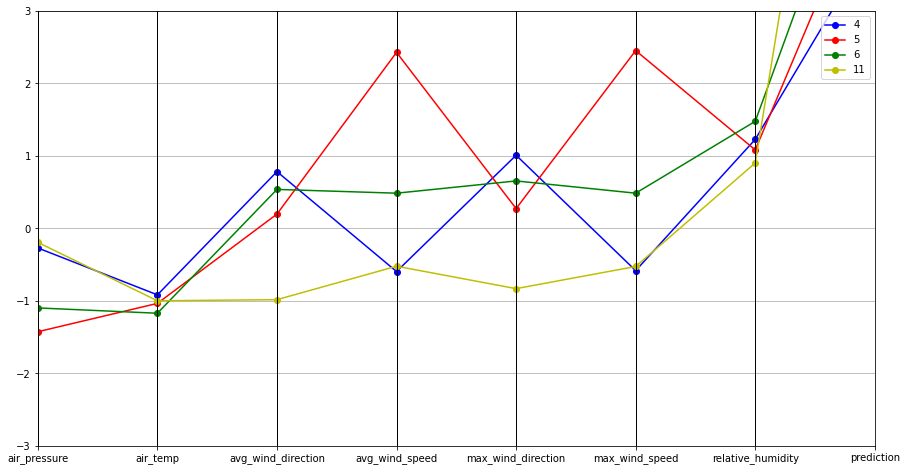

In [29]:
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])